In [254]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [255]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

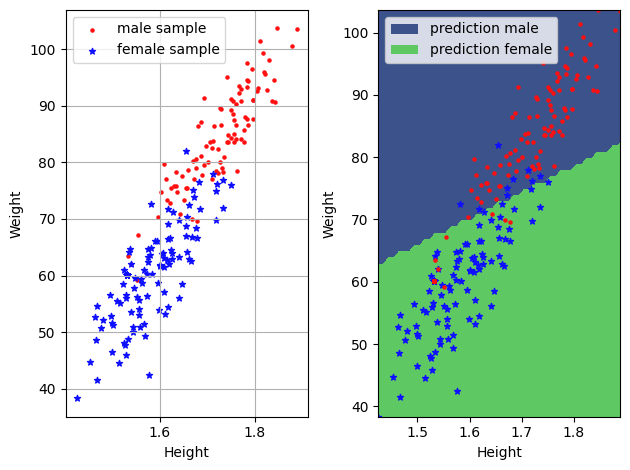

In [256]:
from least_squares import least_squares
from plots import visualization


def least_square_classification_demo(y, x):
    """Least square demo

    Args:
        y:  shape=(N, 1)
        x:  shape=(N, 2)
    """
    # classify the data by linear regression
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # ***************************************************
    # classify the data by linear regression: 
    # ***************************************************
    # w = least squares with respect to tx and y
    w, _ = least_squares(y, tx)

    # visualize your classification.
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")


least_square_classification_demo(y, x)

#### The `least_square_classification_demo` is expected to show

![1](./classification_by_least_square.png)

## Logistic Regression

Compute your cost by negative log likelihood.

In [257]:
def sigmoid(t):
    """apply sigmoid function on t.

    Args:
        t: scalar or numpy array

    Returns:
        scalar or numpy array

    >>> sigmoid(np.array([0.1]))
    array([0.52497919])
    >>> sigmoid(np.array([0.1, 0.1]))
    array([0.52497919, 0.52497919])
    """

    sigmoid = np.exp(t)/(1+np.exp(t))
    return sigmoid


test(sigmoid)

✅ Your `sigmoid` passed 2 tests.


In [258]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        a non-negative loss

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(4).reshape(2, 2)
    >>> w = np.c_[[2., 3.]]
    >>> round(calculate_loss(y, tx, w), 8)
    1.52429481
    """
    assert y.shape[0] == tx.shape[0]
    assert tx.shape[1] == w.shape[0]

    # ***************************************************
    preds = sigmoid(tx @ w)
    eps = 1e-10
    # negative log likelihood
    loss = -np.mean(y * np.log(preds + eps) + (1 - y) * np.log(1 - preds + eps))
    return float(loss)
    # ***************************************************



test(calculate_loss)

❌ The are some issues with your implementation of `calculate_loss`:
**********************************************************************
File "__main__", line 15, in calculate_loss
Failed example:
    round(calculate_loss(y, tx, w), 8)
Expected:
    1.52429481
Got:
    1.5242948
**********************************************************************


In [259]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        a vector of shape (D, 1)

    >>> np.set_printoptions(8)
    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> calculate_gradient(y, tx, w)
    array([[-0.10370763],
           [ 0.2067104 ],
           [ 0.51712843]])
    """
    # ***************************************************
    N = y.shape[0]
    preds = sigmoid(tx @ w)
    grad = (1/N)*tx.T@(preds-y)
    return grad
    # ***************************************************



test(calculate_gradient)

✅ Your `calculate_gradient` passed 5 tests.


### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [260]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression. Return the loss and the updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: float

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> gamma = 0.1
    >>> loss, w = learning_by_gradient_descent(y, tx, w, gamma)
    >>> round(loss, 8)
    0.62137268
    >>> w
    array([[0.11037076],
           [0.17932896],
           [0.24828716]])
    """
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    w = w - gamma * calculate_gradient(y, tx, w)

    return loss, w
    # ***************************************************



test(learning_by_gradient_descent)

✅ Your `learning_by_gradient_descent` passed 7 tests.


Demo!

Current iteration=0, loss=0.6931471803599453
Current iteration=100, loss=0.257278077426852
Current iteration=200, loss=0.23546127647102966
Current iteration=300, loss=0.22402749531478372
Current iteration=400, loss=0.21743934876830068
Current iteration=500, loss=0.21337866190481883
Current iteration=600, loss=0.21074981095752798
Current iteration=700, loss=0.20898450970140892
Current iteration=800, loss=0.20776551226916973
Current iteration=900, loss=0.20690519282306397
Current iteration=1000, loss=0.20628738178508177
Current iteration=1100, loss=0.2058374492401589
Current iteration=1200, loss=0.20550598710323165
Current iteration=1300, loss=0.20525946330474837
Current iteration=1400, loss=0.20507464501122277
Current iteration=1500, loss=0.20493515313045513
Current iteration=1600, loss=0.20482926934973208
Current iteration=1700, loss=0.2047485041818614
Current iteration=1800, loss=0.2046866409591793
Current iteration=1900, loss=0.20463908513143436
Current iteration=2000, loss=0.2046024

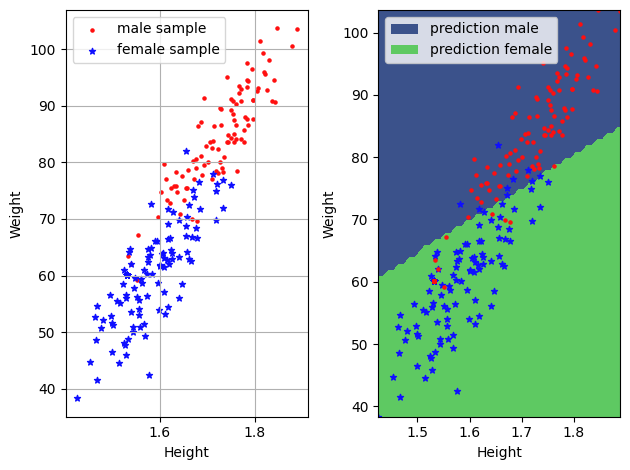

In [261]:
from helpers import de_standardize


def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.5
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(
        y,
        x,
        mean_x,
        std_x,
        w,
        "classification_by_logistic_regression_gradient_descent",
        True,
    )
    print("loss={l}".format(l=calculate_loss(y, tx, w)))


logistic_regression_gradient_descent_demo(y, x)

#### The `logistic_regression_gradient_descent_demo` is expected to show

![1](./classification_by_logistic_regression_gradient_descent.png)

Calculate your hessian below

In [262]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        a hessian matrix of shape=(D, D)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> calculate_hessian(y, tx, w)
    array([[0.28961235, 0.3861498 , 0.48268724],
           [0.3861498 , 0.62182124, 0.85749269],
           [0.48268724, 0.85749269, 1.23229813]])
    """
    # ***************************************************
    N = y.shape[0]
    preds = sigmoid(tx@w)
    S = np.diagflat(preds*(1-preds))
    hessian = (1/N)*tx.T@S@tx
    return hessian
    # ***************************************************



test(calculate_hessian)

✅ Your `calculate_hessian` passed 4 tests.


Write a function below to return loss, gradient, and hessian.

In [263]:
def logistic_regression(y, tx, w):
    """return the loss, gradient of the loss, and hessian of the loss.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        loss: scalar number
        gradient: shape=(D, 1)
        hessian: shape=(D, D)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> loss, gradient, hessian = logistic_regression(y, tx, w)
    >>> round(loss, 8)
    0.62137268
    >>> gradient, hessian
    (array([[-0.10370763],
           [ 0.2067104 ],
           [ 0.51712843]]), array([[0.28961235, 0.3861498 , 0.48268724],
           [0.3861498 , 0.62182124, 0.85749269],
           [0.48268724, 0.85749269, 1.23229813]]))
    """
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)

    return loss, grad, hessian
    # ***************************************************



test(logistic_regression)

✅ Your `logistic_regression` passed 6 tests.


### Using Newton's method
Use Newton's method for logistic regression.

In [264]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step of Newton's method.
    Return the loss and updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: scalar

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> y = np.c_[[0., 0., 1., 1.]]
    >>> np.random.seed(0)
    >>> tx = np.random.rand(4, 3)
    >>> w = np.array([[0.1], [0.5], [0.5]])
    >>> gamma = 0.1
    >>> loss, w = learning_by_newton_method(y, tx, w, gamma)
    >>> round(loss, 8)
    0.71692036
    >>> w
    array([[-1.31876014],
           [ 1.0590277 ],
           [ 0.80091466]])
    """
    # ***************************************************
    loss, grad, hessian = logistic_regression(y, tx, w)
    # ***************************************************

    # ***************************************************
    w = w - gamma * np.linalg.solve(hessian, grad)
    # ***************************************************
    return loss, w


test(learning_by_newton_method)

✅ Your `learning_by_newton_method` passed 8 tests.


demo

Current iteration=0, the loss=0.6931471803599453
Current iteration=1, the loss=0.31705776855258533
Current iteration=2, the loss=0.23652293085669268
Current iteration=3, the loss=0.209987336957326
Current iteration=4, the loss=0.2047819930054446
Current iteration=5, the loss=0.204475599489341
Current iteration=6, the loss=0.20447412789399066
Current iteration=7, the loss=0.20447412785530278
loss=0.20447412785530278


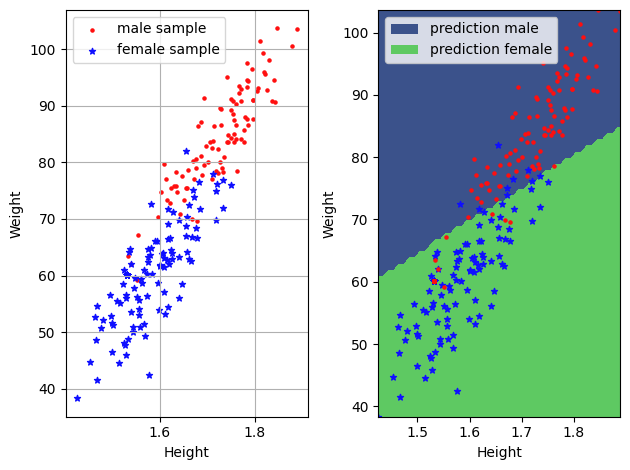

In [265]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.0
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))

        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(
        y,
        x,
        mean_x,
        std_x,
        w,
        "classification_by_logistic_regression_newton_method",
        True,
    )
    print("loss={l}".format(l=calculate_loss(y, tx, w)))


logistic_regression_newton_method_demo(y, x)

#### The `logistic_regression_newton_method_demo` is expected to show

![1](./classification_by_logistic_regression_newton_method.png)

### Using penalized logistic regression
Fill in the function below.

In [266]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss and gradient.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        lambda_: scalar

    Returns:
        loss: scalar number
        gradient: shape=(D, 1)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> lambda_ = 0.1
    >>> loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    >>> round(loss, 8)
    0.62137268
    >>> gradient
    array([[-0.08370763],
           [ 0.2467104 ],
           [ 0.57712843]])
    """
    # ***************************************************

    loss = calculate_loss(y, tx, w) 

    grad = calculate_gradient(y, tx, w) + 2 * lambda_ * w

    return loss, grad
    # ***************************************************



test(penalized_logistic_regression)

✅ Your `penalized_logistic_regression` passed 7 tests.


In [267]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: scalar
        lambda_: scalar

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> np.set_printoptions(8)
    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> lambda_ = 0.1
    >>> gamma = 0.1
    >>> loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
    >>> round(loss, 8)
    0.62137268
    >>> w
    array([[0.10837076],
           [0.17532896],
           [0.24228716]])
    """
    # ***************************************************
    # return loss, gradient: 
    loss, grad = penalized_logistic_regression(y, tx, w, lambda_)
    # ***************************************************
    # ***************************************************
    w = w - gamma * grad
    # ***************************************************
    return loss, w


test(learning_by_penalized_gradient)

✅ Your `learning_by_penalized_gradient` passed 9 tests.


Current iteration=0, loss=0.6931471803599453
Current iteration=100, loss=0.25835336190847025
Current iteration=200, loss=0.23768541250555256
Current iteration=300, loss=0.22712668307683526
Current iteration=400, loss=0.221118413736981
Current iteration=500, loss=0.2174333177179361
Current iteration=600, loss=0.21504465502622186
Current iteration=700, loss=0.21343008749502046
Current iteration=800, loss=0.21230281333942877
Current iteration=900, loss=0.2114955175079534
Current iteration=1000, loss=0.21090565331922942
Current iteration=1100, loss=0.21046773819707124
Current iteration=1200, loss=0.21013848441054606
Current iteration=1300, loss=0.2098884205409336
Current iteration=1400, loss=0.20969697059003864
Current iteration=1500, loss=0.20954945785208665
Current iteration=1600, loss=0.20943522158729203
Current iteration=1700, loss=0.20934639877397798
Current iteration=1800, loss=0.20927711532058355
Current iteration=1900, loss=0.20922293626140742
Current iteration=2000, loss=0.2091804

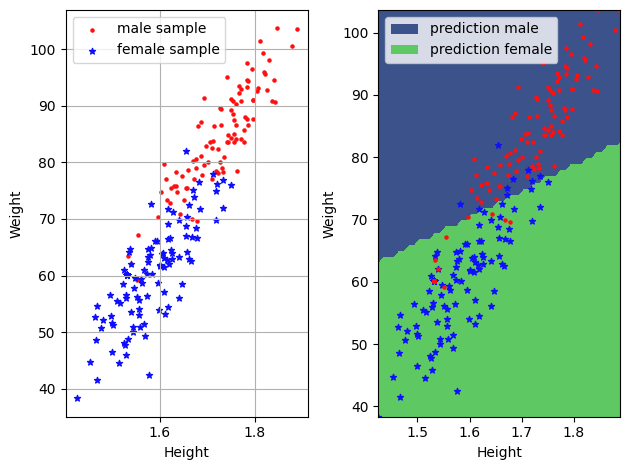

In [268]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.5
    lambda_ = 0.0005
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(
        y,
        x,
        mean_x,
        std_x,
        w,
        "classification_by_logistic_regression_penalized_gradient_descent",
        True,
    )
    print("loss={l}".format(l=calculate_loss(y, tx, w)))


logistic_regression_penalized_gradient_descent_demo(y, x)

#### The `logistic_regression_penalized_gradient_descent_demo` is expected to show

![1](./classification_by_logistic_regression_penalized_gradient_descent.png)